In [1]:
# modulos para analizar los datos
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import matplotlib.patches as patches

In [2]:
#armar colormap para agua y tierra
c_agua=plt.cm.Blues_r(np.linspace(0,0.75,256))
c_terr=plt.cm.Greens_r(np.linspace(0,0.75,256))
cols = np.vstack((c_agua, c_terr))
cmap=cm.colors.LinearSegmentedColormap.from_list("q", cols)

In [6]:
#archivo nc (grd) a cargar
nc_file=r"G:\My Drive\01 UTFSM\04 Memoria\06 HDD\Batimetrias\06-BatisSHOA-20200812T204418Z-001\06-BatisSHOA\DATA_UFSM\malla1s_San_Antonio.grd"

# ver contenidos archivo nc (grd)
data_nc=xr.open_dataset(nc_file)

with data_nc as ds:
  print(ds.keys()) # muestra contenido del archivo .grd

print()
print('Resolucion [arcseg]')
print(abs(np.diff(data_nc.x.values)).mean()*3600)
print(abs(np.diff(data_nc.y.values)).mean()*3600)
print()
print('Limites en x e y')
print('x:\t',data_nc.x.min().values,'\t',data_nc.x.max().values)
print('y:\t',data_nc.y.min().values,'\t',data_nc.y.max().values)

KeysView(<xarray.Dataset>
Dimensions:  (x: 237, y: 181)
Coordinates:
  * x        (x) float64 288.3 288.3 288.3 288.3 ... 288.4 288.4 288.4 288.4
  * y        (y) float64 -33.57 -33.57 -33.57 -33.57 ... -33.62 -33.62 -33.62
Data variables:
    z        (y, x) float64 ...)

Resolucion [arcseg]
0.9991525423726663
1.0020000000000095

Limites en x e y
x:	 288.3319 	 288.3974
y:	 -33.6196 	 -33.5695


In [27]:
x_mareografo, y_mareografo=288.665, -29.94969254

z_boya=data_nc.z.sel(x=x_mareografo,y=y_mareografo,method="nearest").values.item()
z_boya

-0.03432826689591647

NameError: name 'x_mareografo' is not defined

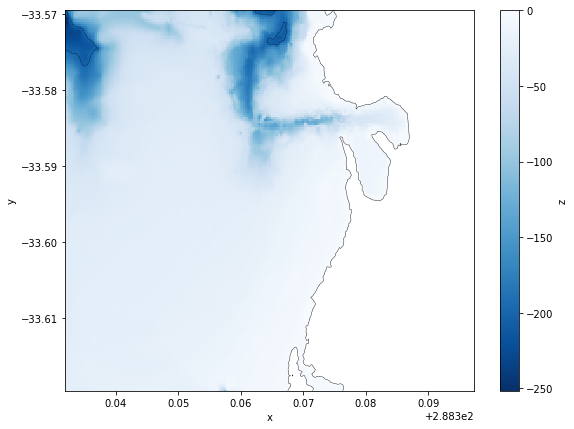

In [7]:
#Plotear batimetria
variable=data_nc.z.where(data_nc.z<=0)

#divnorm = cm.colors.DivergingNorm(vmin=data_nc.deformed_bathy.min(), vcenter=0, vmax=data_nc.deformed_bathy.max())

variable.plot.imshow(aspect=ds.dims['x'] / ds.dims['y'],size=7,cmap='Blues_r')
                          #,cmap=cmap,norm=divnorm)   #variable de interes
data_nc.z.plot.contour(levels=[-200,0], colors='k',linewidths=0.4) #curva de nivel 0 y 200m
plt.scatter(x_mareografo,y_mareografo,color="r")

plt.grid()

#plt.savefig(nombre_archivo+'_'+nombre_variable+'.png',dpi=300) !!!!Falta arreglar nonmbre de archivo

print(z_boya)

### Plotear dominios y mareografos

In [2]:
# grilla de base(la mas grande)
grd_base=r"G:\My Drive\01 UTFSM\04 Memoria\06 HDD\Tareas\tarea02\HySea\L0_v3.grd"

#grillas anidadas
grd_1=r"G:\My Drive\01 UTFSM\04 Memoria\06 HDD\Tareas\tarea02\HySea\bat_l2_quin2sano_conf1.grd"
grd_2=r"G:\My Drive\01 UTFSM\04 Memoria\06 HDD\Tareas\tarea02\HySea\bat_l2_serecoq_conf1.grd"
grd_3=r"G:\My Drive\01 UTFSM\04 Memoria\06 HDD\Tareas\tarea02\HySea\bat_l3_quin2valp_conf1.grd"
grd_4=r"G:\My Drive\01 UTFSM\04 Memoria\06 HDD\Tareas\tarea02\HySea\bat_l3_serecoq_conf1.grd"
grd_5=r"G:\My Drive\01 UTFSM\04 Memoria\06 HDD\Tareas\tarea02\HySea\bat_l4_serecoq_conf1.grd"
grd_6=r"G:\My Drive\01 UTFSM\04 Memoria\06 HDD\Tareas\tarea02\HySea\bat_l4_vinavalpo_conf1.grd"

batis=[grd_base,grd_1,grd_2,grd_3,grd_4,grd_5,grd_6] #aqui anotar las variables a plotear, la primera debe ser la batimetria de base

In [4]:
# Mareografos

# Lee archivo ts.xy
ts_file=r"G:\My Drive\01 UTFSM\04 Memoria\06 HDD\Tareas\deformaciones_nati\ts_zcentro.xy"

coords=[] # aqui se guardaran las coordenadas del archivo .xy
with open(ts_file, 'r') as reader: # abre el archivo
    for line in reader.readlines()[1:]: # para cada linea, saltandose la primera
        line = line.replace('\n','') # reemplaza saltos de linea por espacios en blanco
        line=line.rsplit(sep=' ') # Separa la linea en donde haya espacios
        coords.append(line) #agrega las coordenadas (texto a la lista coords)

coords=np.array(coords) # transforma la lista a formato np.array
coords=coords.astype(np.float) # pasa de sting a numero (float)

etiquetas=['coqu','ptal','pich','qtro','valp','sano']


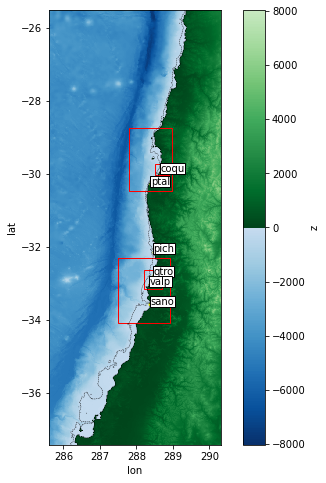

In [23]:
data_base=xr.open_dataset(grd_base) # carga batimetria de base (la mas grande)

fig,ax1=plt.subplots(figsize=(8,8)) # genera figura en donde iran los dibujos
data_base.z.plot.imshow(cmap=cmap,ax=ax1) # plotea batimetria de base, en ax1
data_base.z.plot.contour(levels=[-200,0], colors='k',linewidths=0.4,ax=ax1) #plotea linea de costa y curva de nivel -200

for i in range(1,len(batis)): # para cada bati de la lista (saltandose el primero)
    data_nc=xr.open_dataset(batis[i]) # carga la bati
    
    # Aqui se definen las caracteristicas principales del rectangulo
    inf_izq=[data_nc.x.values[0],data_nc.y.values[-1]] # coordenada inferior izquierda
    ancho=data_nc.x.values[-1]-data_nc.x.values[0] # ancho del rectangulo
    alto=data_nc.y.values[0]-data_nc.y.values[-1] # alto del rectangulo
    
    rect=patches.Rectangle((inf_izq[0],inf_izq[1]),ancho,alto,linewidth=1,edgecolor='r',facecolor='none') #genera el rectangulo
    ax1.add_patch(rect) # plotea el rectangulo, en ax1
    ax1.set_aspect('equal') # lo deja en la misma escala horizontal y vertical

ax1.scatter(coords[:,0],coords[:,1],c='yellow',s=8) # plotea mareografos de archivo .xy en ax1


for etiqueta, x, y in zip(etiquetas, coords[:, 0], coords[:, 1]): #agregar etiquetas, lo encontre en internet
    plt.annotate(etiqueta,xy=(x, y),bbox=dict(boxstyle='square,pad=0.05',fc='white')) # falta afinar la ubicacion de las etiquetas

plt.show() # muestra el ploteo